In [1]:
import matplotlib
%matplotlib inline
from pylab import *
import os, h5py
from readsnapsgl import readsnap
import pymsz

matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

safecolor={ 'silver':'#c0c0c0', 'gray':'#808080', 'black':'#000000', 'red':'#ff0000',
    'maroon':'#800000', 'yellow':'#ffff00', 'olive':'#707030', 'lime':'#00ee00',
    'green':'#009000', 'aqua':'#00eeee', 'teal':'#00a0a0', 'blue':'#0000ff',
    'nave':'#000080', 'fuchsia':'#ff00ff', 'purple':'#900090'}

In [3]:
# The example cluster is from the 300 project run with GIZMO-Simba
# cluster center and R200 from AHF halo catalogue
sf = h5py.File('snap_CL288.hdf5','r')
cc = np.asarray([  500095.89011853, 500286.04465527,  500481.30095660])
rr = 1446.17

In [4]:
sf.keys()

<KeysViewHDF5 ['Header', 'PartType0', 'PartType1', 'PartType2', 'PartType3', 'PartType4', 'PartType5']>

In [5]:
list(sf['Header'].attrs.items())

[('BoxSize', 1000000.0),
 ('Flag_Cooling', 1),
 ('Flag_DoublePrecision', 0),
 ('Flag_Feedback', 1),
 ('Flag_IC_Info', 3),
 ('Flag_Metals', 11),
 ('Flag_Sfr', 1),
 ('Flag_StellarAge', 1),
 ('HubbleParam', 0.6777),
 ('MassTable', array([0., 0., 0., 0., 0., 0.])),
 ('NumFilesPerSnapshot', 1),
 ('NumPart_ThisFile',
  array([386109, 468906,      0,      0,  53544,    929], dtype=uint32)),
 ('NumPart_Total',
  array([386109, 468906,      0,      0,  53544,    929], dtype=uint32)),
 ('NumPart_Total_HighWord', array([0, 0, 0, 0, 0, 0], dtype=uint32)),
 ('Omega0', 0.307115),
 ('OmegaLambda', 0.692885),
 ('Redshift', -2.220446049250313e-16),
 ('Time', 1.0000000000000002)]

# load snapshot to pymsz

In [6]:
simd = pymsz.load_data('snap_CL288.hdf5', snapshot=True, center=cc, radius=rr, cut_sfr=0.1, restrict_r=False)

reading files:  ['snap_CL288.hdf5']
Reading snap_CL288.hdf5 file with Header


# model preparation

In [7]:
angular= 75 # in argsec
pj = pymsz.TT_model(simd, npixel='AUTO', axis='z', neighbours=64, redshift=0.1, 
                    AR=angular,Ncpu=1,sph_kernel='cubic',Memreduce=True)

Convert the neighbor count in pixel size:  2.3239046245134736
Init smoothing, RAM=0.2891 GB
After cKDTree , RAM=0.295 GB
Directly pass the cKDTree to tasks with Python version 3.8.10 (default, Mar 13 2023, 10:26:41) 
[GCC 9.4.0]


# output the sz-y maps

In [9]:
pj.write_fits_image("SZ-z.fits", overwrite=True, 
                    comments="Simulation redshift: 0.1") 

In [10]:
from astropy.io import fits

In [20]:
szyf=fits.open('SZ-z.fits',ignore_missing_simple=True)

In [21]:
szyf.info()

Filename: SZ-z.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      32   (30, 30)   float64   


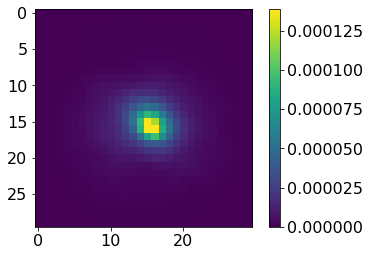

In [24]:
imshow(szyf[0].data)
colorbar()